In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
store_data = pd.read_csv('store_interval.csv')
train_data = pd.read_csv('train.csv')

# 데이터 구조확인
# 데이터 열, 결측값 파악
print(store_data.head())
print()
print(train_data.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

   PromoInterval  
0              0  
1              1  
2              1 


Store Data: 
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                  0
dtype: int64

Train Data: 
 Store            0
DayOfWeek        0
Date             0
Sales            1
Customers        1
Open             1
Promo            1
StateHoliday     1
SchoolHoliday    1
dtype: int64
0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
dtype: int64
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c             

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

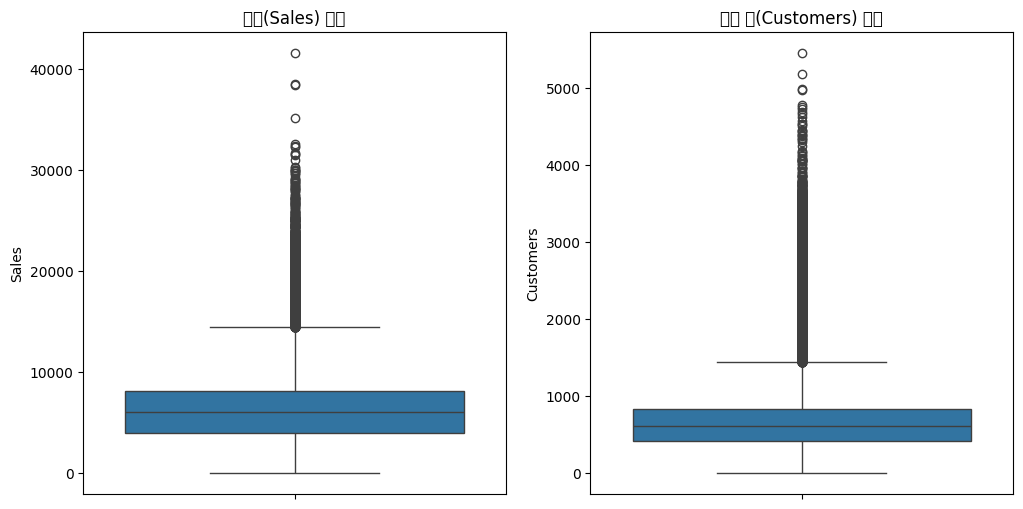

In [3]:
# 3-1 데이터 결측값 확인
print('\nStore Data: \n',store_data.isnull().sum())
print('\nTrain Data: \n',train_data.isnull().sum())

# 3-2 평균값 계산
mean_competition_distance = store_data['CompetitionDistance'].mean()

# 3-3 결측값을 평균값으로 대체
store_data['CompetitionDistance'].fillna(mean_competition_distance, inplace=True)

# 3-4 결측값 대체 후 확인
print(store_data['CompetitionDistance'].isnull().sum())


# 3-5 가장 일찍 개장한 경쟁 매장의 연도와 월을 찾아서 대체
'''
이 코드는 CompetitionOpenSinceMonth와 CompetitionOpenSinceYear
열에서 가장 작은 값, 즉 가장 초기에 개장한 경쟁 매장의 월과 연도를 찾습니다.

'''
min_month = store_data['CompetitionOpenSinceMonth'].min()
min_year = store_data['CompetitionOpenSinceYear'].min()

# 3-6 결측값 대체
'''
이 부분에서는 fillna 함수를 사용하여 결측값을
위에서 찾은 가장 초기의 월과 연도로 대체합니다.
inplace=True는 데이터 프레임의 원본을 직접 수정하겠다는 의미입니다.
'''
store_data['CompetitionOpenSinceMonth'].fillna(min_month, inplace=True)
store_data['CompetitionOpenSinceYear'].fillna(min_year, inplace=True)

# 3-7 결측값 대체 후 확인
'''
마지막으로, 결측값이 제대로 대체되었는지 확인하기 위해
각 열의 결측값 수를 다시 계산하고 출력합니다.
'''
print(store_data[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].isnull().sum())

'''

이러한 방법을 통해 결측값을 처리하면 데이터의 일관성을 유지하고,
분석에서 보다 정확한 결과를 도출

'''

# 4. 오픈하지 않은 스토어의 판매 데이터 확인

# 4-1 스토어 데이터와 트레인 데이터를 'Store' 열을 기준으로 병합
merged_data = pd.merge(train_data, store_data, on='Store')

# 4-2 스토어가 오픈하지 않은 날에 판매가 있는지 확인
closed_sales = merged_data[(merged_data['Open'] == 0) & (merged_data['Sales'] > 0)]

# 병합된 데이터의 첫 5행 출력
merged_data.head()

print(store_data.head())
print(train_data.head())

# 4-3 결과 출력
print(closed_sales)

# 'Sales'와 'Customers' 열에 대한 박스 플롯 생성
# Boxplot을 통해 이상치 값 확인

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=train_data['Sales'])
plt.title('매출(Sales) 분포')

plt.subplot(1, 2, 2)
sns.boxplot(y=train_data['Customers'])
plt.title('고객 수(Customers) 분포')

plt.show()

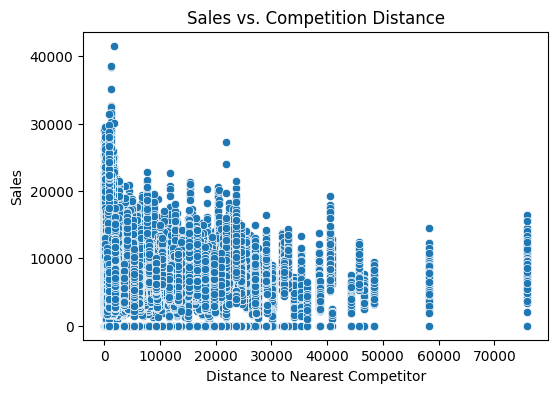

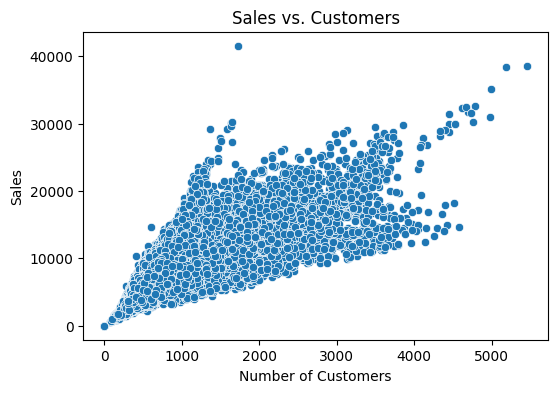

In [5]:
# 데이터 병합 (이미 merged_data를 생성했으므로 활용)

# 1. 경쟁 매장과의 거리와 판매량의 관계
plt.figure(figsize=(6, 4))
sns.scatterplot(data=merged_data, x='CompetitionDistance', y='Sales')
plt.title('Sales vs. Competition Distance')
plt.xlabel('Distance to Nearest Competitor')
plt.ylabel('Sales')
plt.show()

# 2. 일일 판매량과 고객 수의 관계
plt.figure(figsize=(6, 4))
sns.scatterplot(data=train_data, x='Customers', y='Sales')
plt.title('Sales vs. Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

float64


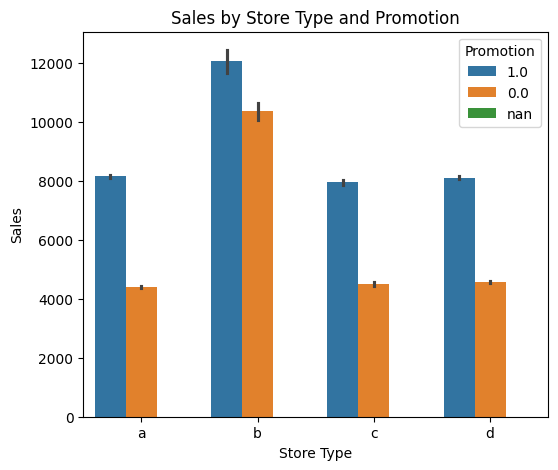

In [7]:
# ==================================#
# 매장 유형 별 프모, 비프모 판매량 비교  #
# ==================================#


#먼저 'StoreType' 열을 명시적으로 순서 있는 카테고리 데이터로 변환합니다.
merged_data['StoreType'] = pd.Categorical(merged_data['StoreType'], categories=['a', 'b', 'c', 'd'], ordered=True)
# Promo 열의 데이터 타입 확인
print(merged_data['Promo'].dtype)

# Promo 열을 문자열로 변환
merged_data['Promo'] = merged_data['Promo'].astype(str)

# 시각화 코드 실행
plt.figure(figsize=(6, 5))
sns.barplot(x='StoreType', y='Sales', hue='Promo', data=merged_data)
plt.title('Sales by Store Type and Promotion')
plt.xlabel('Store Type')
plt.ylabel('Sales')
#plt.legend(title='Promotion',  labels=['Promotion', 'No Promotion']) # 파 = 1, 오 = 0
plt.legend(title='Promotion') # 파 = 1, 오 = 0
plt.show()

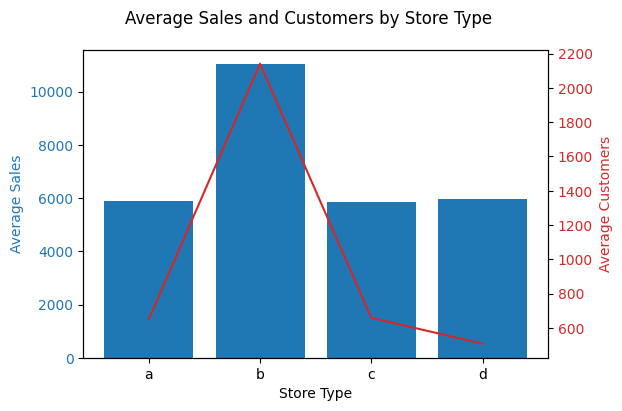

In [9]:
# ============================#
# 프모,비프모 그룹핑 월별 매출 #
# ====================================#
# 매장 유형별 평균 매출과 평균 고객 수
#  b매장을 위한 이상치 분석
# ====================================#


#매장 유형('StoreType')별로 매출('Sales')과 고객 수('Customers')의 관계를 시각화
#먼저 'StoreType'에 따른 평균 매출과 평균 고객 수를 계산합니다.
store_type_sales_customers = merged_data.groupby('StoreType').agg({'Sales':'mean', 'Customers':'mean'}).reset_index()

# 매출과 고객 수의 관계를 시각화합니다.
fig, ax1 = plt.subplots(figsize=(6, 4))

# 매출에 대한 바 차트
color = 'tab:blue'
ax1.set_xlabel('Store Type')
ax1.set_ylabel('Average Sales', color=color)
ax1.bar(store_type_sales_customers['StoreType'], store_type_sales_customers['Sales'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 고객 수에 대한 라인 차트를 같은 그래프에 표시
ax2 = ax1.twinx()  # 같은 x축을 공유하는 새로운 y축 생성
color = 'tab:red'
ax2.set_ylabel('Average Customers', color=color)
ax2.plot(store_type_sales_customers['StoreType'], store_type_sales_customers['Customers'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 타이틀 설정
fig.suptitle('Average Sales and Customers by Store Type')

# 그래프 표시
plt.show()

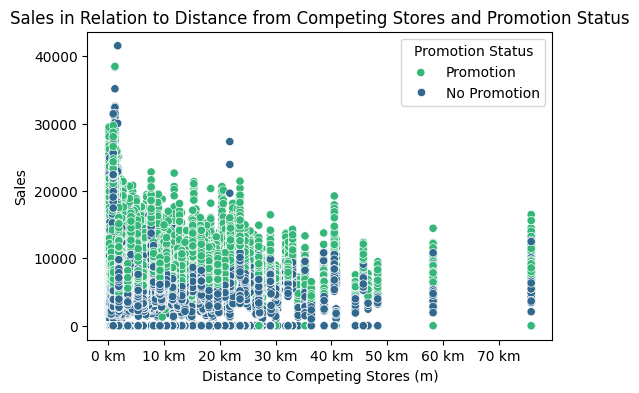

In [10]:
# ============================#
# 최종 경쟁 매장 거리, 프모 비교 #
# ============================#

# 데이터 병합
from matplotlib.ticker import FuncFormatter
merged_data = pd.merge(train_data, store_data, on='Store')

# 프로모션 여부에 따라 색상을 다르게 하여 산점도 그리기

#단위 변환을 위한 함수 정의: 미터를 킬로미터로 변환
def to_kilometers(x, pos):
     return f'{int(x / 1000)} km'

plt.figure(figsize=(6, 4))
sns.scatterplot(x='CompetitionDistance', y='Sales', hue='Promo', data=merged_data, palette='viridis')
formatter = FuncFormatter(to_kilometers)
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Sales in Relation to Distance from Competing Stores and Promotion Status')
plt.xlabel('Distance to Competing Stores (m)')
plt.ylabel('Sales')
plt.legend(title='Promotion Status', labels=['Promotion', 'No Promotion'])  # 초록 = 1
plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 병합
from matplotlib.ticker import FuncFormatter

merged_data = pd.merge(train_data, store_data, on='Store')

# Features와 Target 분리
X = merged_data.drop(columns=['Sales'])  # Sales를 제외한 나머지 열은 Features
y = merged_data['Sales']                 # Sales 열은 Target

# 데이터를 학습 데이터와 테스트 데이터로 분할 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분할된 데이터 확인
print("학습 데이터 크기:", X_train.shape, y_train.shape)
print("테스트 데이터 크기:", X_test.shape, y_test.shape)

학습 데이터 크기: (89683, 17) (89683,)
테스트 데이터 크기: (22421, 17) (22421,)


Mean Squared Error: 2165631.78
R-squared: 0.85


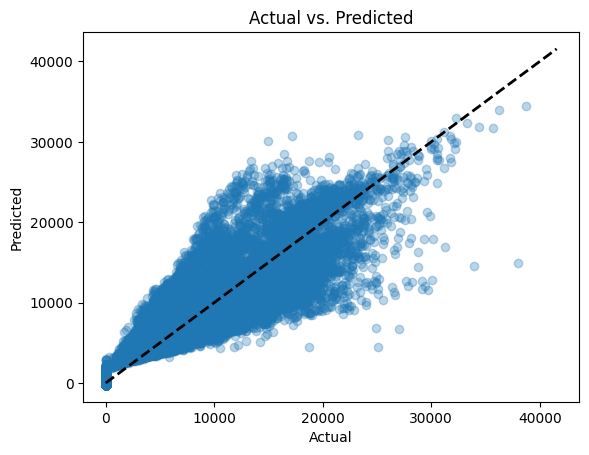

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 로드
store_data = pd.read_csv('store.csv')
# dtype 옵션을 사용하여 7번 열의 데이터 타입을 문자열로 지정
train_data = pd.read_csv('train.csv', dtype={7: str}, low_memory=False)

# 데이터 병합 및 필요한 열 선택
data = pd.merge(train_data, store_data, on='Store')
data = data[['Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance']]

# 결측치 제거
data.dropna(inplace=True)

# 특성과 타겟 분리
X = data[['Customers', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance']]
y = data['Sales']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# 예측 값과 실제 값 시각화
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()